In [1]:
# Library Imports

import numpy as np
import matplotlib.pyplot as plt
import requests
import io


In [2]:
# defining line function
def line(m, b, X): 
    return m * X + b

# defining non-linear exponential function
def nl_exp(l, b, X): 
    return(np.exp(l*X+b))

# defining linear loss(mse) function
def loss (m, b, X, Y) : 
    return np.sum(np.square(Y-line(m,b,X)))

# defining linear loss(rmse) function
def loss_root (m, b, X, Y) : 
    return np.sqrt(np.sum(np.square(Y-line(m,b,X))))

# defining exponential loss function
def nl_exp_loss (l, b, X, Y) : 
    return np.sum(np.square(Y-nl_exp(l,b,X)))

# defining gradient function
def gradient (m, b, X, Y) : 
    dm = (-2) * np.sum(X * (Y - line(m,b,X)))
    db = (-2) * np.sum(Y - line(m,b,X))
    return (dm, db)


# Part1 Better gradient descent for optimization (40 points):
* * *
You are welcome to take inspiration from the class materials for this part. 
Create a notebook called gradient_descent.ipynb.
We want to make a better version of a 2D gradient descent algorithm with a few extra bells and whistles. 
Here’s the function definition.
* * *
```python
def gradient_descent(gradient, X, Y, initial, learning_rate=0.001, max_iter=100, stop_tolerance=1e-03, online_loss_plot=True):
```
* * *
gradient should be a callable python object/function that will be called to update your model parameters X, Y are arrays that contain your data points initial is an array containing the starting values for the parameters of your model learning_rate and max_iter should be clear stop_tolerance is a value that checks in each iteration whether all gradient updates are smaller than this value, and if so, stops the gradient descent. 
If online_loss_plot is True, then the function should plot the full loss curve at each iteration (use a wait-time of 0.01s internally to not overload the plotting). 
Check the class notebook for an example or use your own way to do this in ipython notebooks.
The function needs to return the optimal parameters of your model in an array
* * *


In [19]:
import time
from IPython import display

# Define the gradient descent function to optimize a linear function
def gradient_descent(gradient, X, Y, initial, learning_rate=0.001, 
                    max_iter=100, stop_tolerance=1e-03, online_loss_plot=True,
                    xlabel=None, ylabel=None):
    
    # Initialize an empty list to store the loss values at each iteration
    errors = []
    
    # Extract the initial values for the slope (m) and y-intercept (b) from the 'initial' list
    [m, b] = initial
    
    # Create a linear range of x-values for plotting purposes
    x = np.linspace(min(X), max(X), 100)
    
    # Loop through the specified number of iterations
    for i in range(max_iter):
        
        # Calculate the gradient (partial derivatives) using the provided gradient function
        dm, db = gradient(m, b, X, Y)
        
        # Check if the gradient values are 'nan', which could indicate issues like division by zero or very large values
        if np.isnan(dm) or np.isnan(db):
            print("Gradient exploded at iteration", i)
            break
        
        # Update the slope (m) and y-intercept (b) using the calculated gradients and the specified learning rate
        m -= learning_rate*dm
        b -= learning_rate*db
        
        # Calculate the predicted y-values using the updated m and b
        y = [m * x_i + b for x_i in x]
        
        # Compute the loss using the 'loss' function and append it to the 'errors' list
        errors.append(loss(m, b, X, Y))
        
        # Check if the change in loss between the current and previous iteration is below the stop tolerance
        if i > 0:
            if abs(errors[i-1] - errors[i]) < stop_tolerance:
                break
        
        # If real-time plotting is enabled, plot the data points and the regression line at each iteration
        if online_loss_plot:
            # plotting side-by-side ref : https://www.geeksforgeeks.org/place-plots-side-by-side-in-matplotlib/

            # plotting the data points and the regression line
            plt.figure(figsize=(10,10))
            plt.subplot(2, 1, 1)
            plt.scatter(X, Y, color='blue', alpha=0.6)
            plt.plot(x, y, color='red')          
            plt.grid()
            plt.title('Current iteration {}, Total loss = {:.2f}'.format(i+1, errors[i]))
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)

            # plotting the loss
            plt.figure(figsize=(10,10))     
            plt.subplot(2, 1, 2)
            plt.plot(errors[:i],'b.-') # loss
            plt.xlabel('Iteration')
            plt.ylabel('Summed Squared Error')

            plt.tight_layout()
            plt.show()
            time.sleep(0.01)

            display.clear_output(wait=True)
    
    # After all iterations, if real-time plotting is enabled, plot the loss values over all iterations
    if online_loss_plot:
        plt.figure(figsize=(10,10))
        plt.subplot(2, 1, 1)
        plt.scatter(X, Y, color='blue', alpha=0.6)
        plt.plot(x, y, color='red')          
        plt.grid()
        plt.title('Current iteration {}, Total loss = {:.2f}'.format(i+1, errors[i]))
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

        # plotting the loss
        plt.figure(figsize=(10,10))     
        plt.subplot(2, 1, 2)
        plt.plot(errors,'b.-') # loss
        plt.xlabel('Iteration')
        plt.ylabel('Summed Squared Error')

        plt.tight_layout()
        plt.show()
    
    # Return the optimized values for the slope (m) and y-intercept
    return [m, b]
    

# Part2 Fitting a line (40 points):
* * *
Add all code to the same gradient_descent.ipynb.
Add code to test the function with meaningful parameters to fit data from the WHO on how life expectancy may depend on GDP.
The data is taken from https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who and is available via a shared Google Drive link, for which you will need to insert the
following code:
* * *
``` python
# method to download data from a shared, public link
!gdown 1ls8UVNIxToijFweUfhjkLsjS45z9-WP_
# load the data
data = np.genfromtxt('/content/Life Expectancy Data.csv',
delimiter=',')
print(data.shape)
# life expectancy
Y = data[1:, 3]
# GDP
X = data[1:, 16]
# we will focus on higher-income countries only!
ind = X>10000
Y = Y[ind]
X = X[ind]
```

* * *
Plot the data and resulting line together with the loss plot. Remember to include
proper x-axis and y-axis labels and in general to produce nice-looking plots! In order
to solve this, you obviously will need to define the gradient function properly and
pass it to gradient_descent!
Experiment with the learning_rate parameter such that the function fits the line
with a minimal number of iterations and add these to the notebook. You will need
to experiment a little to find out the minimal number of iterations!!
As you can see, we filtered the data to focus only on higher-income countries. If you
look at all data, what can you say about the dependency of life expectancy on GDP?
Insert your discussion into the notebook!
* * * 

In [20]:
# load the data
data = np.genfromtxt('content\Life Expectancy Data.csv', delimiter=',')

filtered_data = data[~np.isnan(data[:, 3]) & ~np.isnan(data[:, 16])]

# Extracting life expectancy and GDP columns
Y = filtered_data[:, 3]
X = filtered_data[:, 16]

# Filtering to focus on higher-income countries (GDP > 10,000)
ind = X > 10000
Y = Y[ind]
X = X[ind]

# standardizing the data (mean = 0, std = 1)
X = (X - np.mean(X)) / np.std(X)

# data.shape : (2939, 22)
# X.shape : (445,)
# Y.shape : (445,)

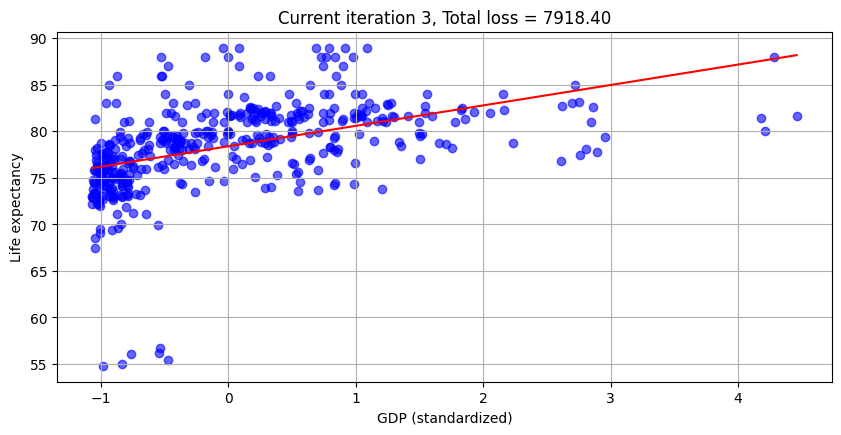

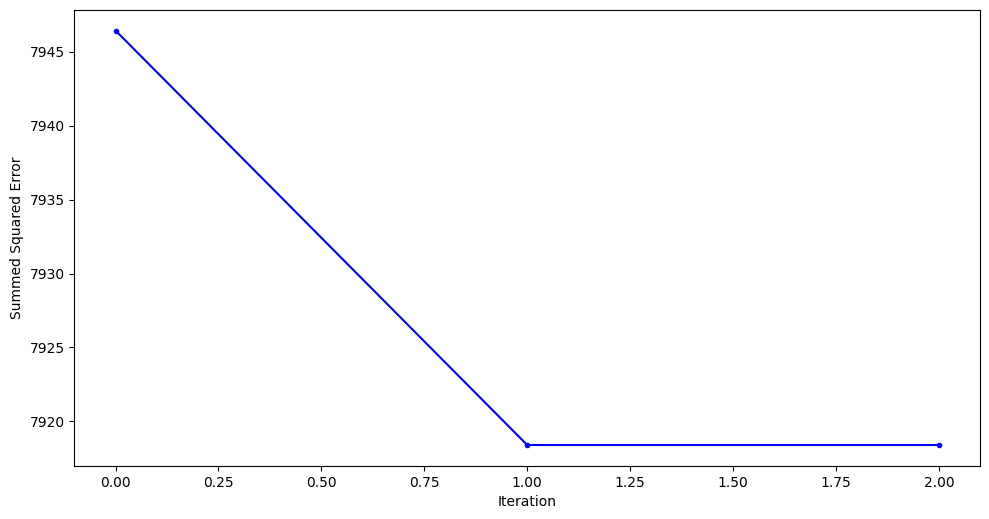

[2.195531882009576, 78.39617720639488]

In [21]:
learning_rate = 0.00112 #define learning_rate
initial=[0,0] # initialize weight and bias

gradient_descent(gradient, X, Y, initial, learning_rate, max_iter=100, stop_tolerance=1e-03, 
                online_loss_plot=True, xlabel='GDP (standardized)', ylabel='Life expectancy') # Run the gradient descent function

# lr : 0.00112, 1 iterations to converge
# lr : 0.001, 5 iterations to converge

# Discussion : 
* * *
We filtered the data to focus only on higher-income countries. If you look at all data, what can you say about the dependency of life expectancy on GDP?
* * *

A : GDP가 낮은 나라일수록 Life expectancy와의 관계가 뚜렷하지 않고 넓게 분산되어 있음. Life expectancy는 더 다양한 요인과 연관이 있기 때문에, 전체 GDP 데이터로 그래프를 표현하면 dependency가 거의 나타나지 않음.

B : GDP가 낮은 나라가 포함되면 regression line이 더 내려올것이고 이는 높은 GDP가 Life expectancy를 증가시킨다고 결론 낼 수 있음

# Part3 Exponential optimization (40 points):
* * *
Add all code to the same gradient_descent.ipynb.
Take the exponential data from the COVID outbreak and fit this in a smarter way by fitting everything in a logarithmic sense, so that exp(ax+b) becomes log(exp(ax+b)) = ax+b, which is simply a line.
So, if you take your data and transform it into logarithmic units, you can just call the usual least-squares line fit.
Add the code to do these transformations and plot the result for the COVID data. 
Do you get the same result as the “raw” exponential fit? 
Compare the fits of both types of optimizations using the loss plot and the resulting parameters.
Why can you take the logarithm of the loss function and optimize this instead?
Add an explanation to the notebook that tells me why that is possible.
* * *

(421, 17)


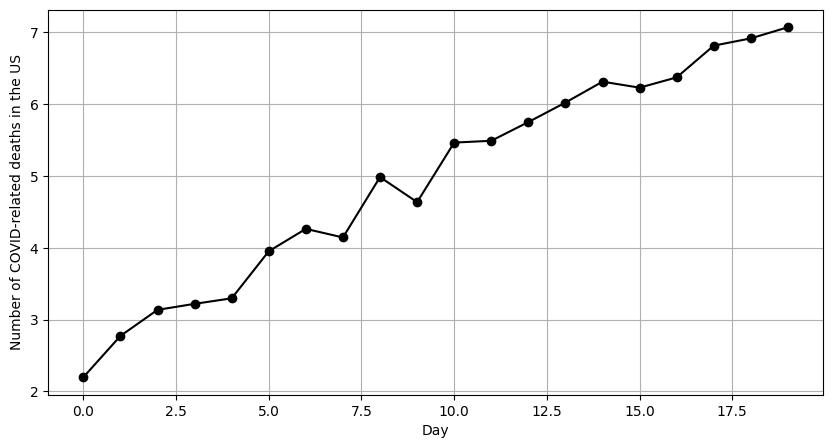

In [6]:
# Part3 Exponential optimization (40 points):

# load the data
response = requests.get('https://covidtracking.com/data/download/national-history.csv')
# not strictly necessary but good practice
response.raise_for_status()
# interpret results as BYTES, so that numpy can read from it!
data = np.genfromtxt(io.BytesIO(response.content),delimiter=',')
print(data.shape)

X = np.arange(20)
Y = data[340:360, 2]
Y = np.flip(Y)
Y = np.log1p(Y) #applying log scale to data since data grows on exponential form and also we want to apply linear regression to original data

fig = plt.figure(figsize=(10,5))
plt.plot(X,Y,'ko-')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Number of COVID-related deaths in the US')
plt.show()


In [7]:
# Define a gradient descent function tailored for a COVID dataset to optimize a linear function
def gradient_descent_COVID(gradient, X, Y, initial, learning_rate=0.001, max_iter=100, stop_tolerance=1e-03, online_loss_plot=True, ylim=10): 
    
    # Initialize an array to store the loss values at each iteration
    errors = []
    [m,b] = initial
    
    # Generate a range of x-values for plotting purposes
    x = np.arange(0, 20)
    
    # Loop through the specified number of iterations
    for i in range(max_iter):
        
        # Calculate the gradient (partial derivatives) using the provided gradient function
        dm, db = gradient(m, b, X, Y)
        
        # Update the slope (m) and y-intercept (b) using the calculated gradients and the specified learning rate
        m -= learning_rate * dm
        b -= learning_rate * db
        
        # Calculate the predicted y-values using the updated m and b
        y = [m * x_i + b for x_i in x]
        
        # Compute the loss using the 'loss' function and store it in the 'errors' array
        errors.append(loss(m, b, X, Y))
        
        # Check if the change in loss between the current and previous iteration is below the stop tolerance
        if i > 0:
            if abs(errors[i-1] - errors[i]) < stop_tolerance:
                # If the change in loss is below the tolerance, break the loop early
                break
        
        # If real-time plotting is enabled, plot the data points and the regression line at each iteration
        if online_loss_plot:
            plt.figure(figsize=(10,6))
            display.clear_output(wait=True)
            plt.xlim(0, 20)
            plt.ylim(0, ylim)
            plt.scatter(X, Y, c='b')  # Plot the actual data points
            plt.plot(x, y, c='k')  # Plot the current regression line
            plt.grid()
            plt.title('Current iteration {}, Total loss = {:.2f}'.format(i+1, loss(m, b, X, Y)))
            time.sleep(0.01)
            plt.show()
    
    # After all iterations, if real-time plotting is enabled, plot the loss values over the performed iterations
    if online_loss_plot:
        fig, ax = plt.subplots(figsize=(8,6))
        plt.plot(errors[0:i], 'b.-')
        plt.xlabel('Iteration')
        plt.ylabel('Summed Squared Error')
        plt.grid()
    
    # Return the optimized values for the slope (m) and y-intercept (b)
    return [m,b]


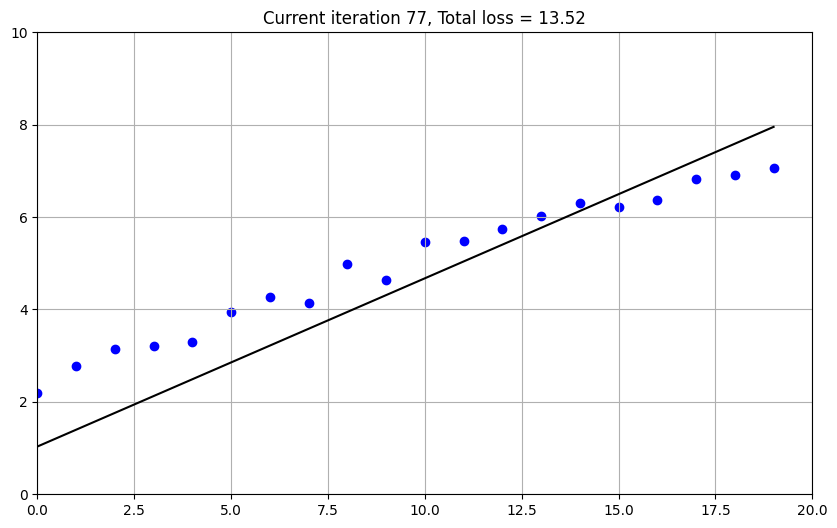

[0.3644304208966671, 1.0332285342250704]

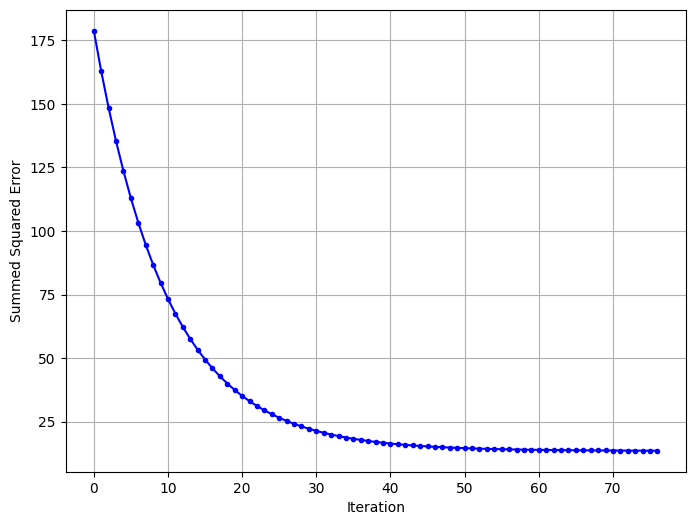

In [8]:
initial = [0.1, 1] # Set the initial weight (slope) and bias (intercept)
learning_rate = 1e-5 # Set the learning rate

gradient_descent_COVID(gradient, X, Y, initial,learning_rate,stop_tolerance=1e-02, ylim=10) #update initial weight till the loss converges

### Without log transformation

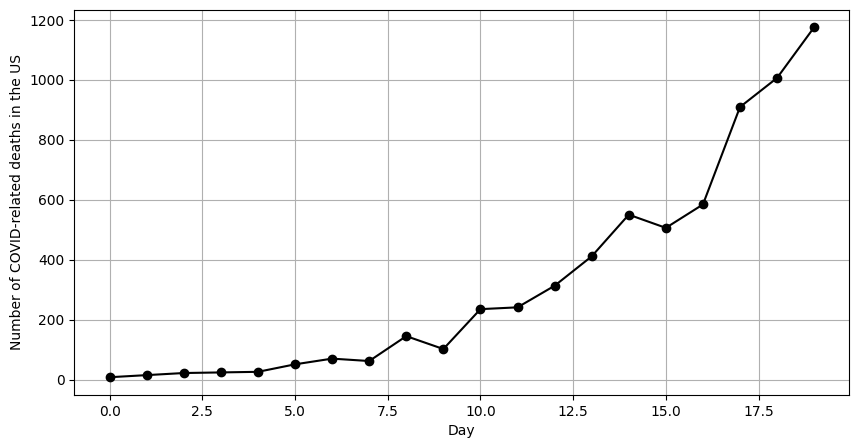

In [9]:
X = np.arange(20)
Y = data[340:360, 2]
Y = np.flip(Y)

# Leaving out log transformation
# Y = log1p(Y) #applying log scale to data since data grows on exponential form and also we want to apply linear regression to original data

fig = plt.figure(figsize=(10,5))
plt.plot(X,Y,'ko-')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Number of COVID-related deaths in the US')
plt.show()


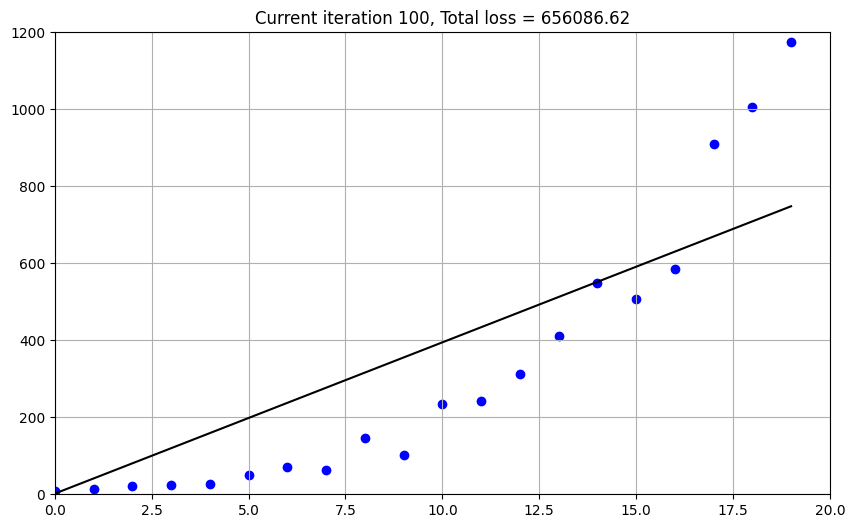

[39.27803479520233, 1.8151798904959284]

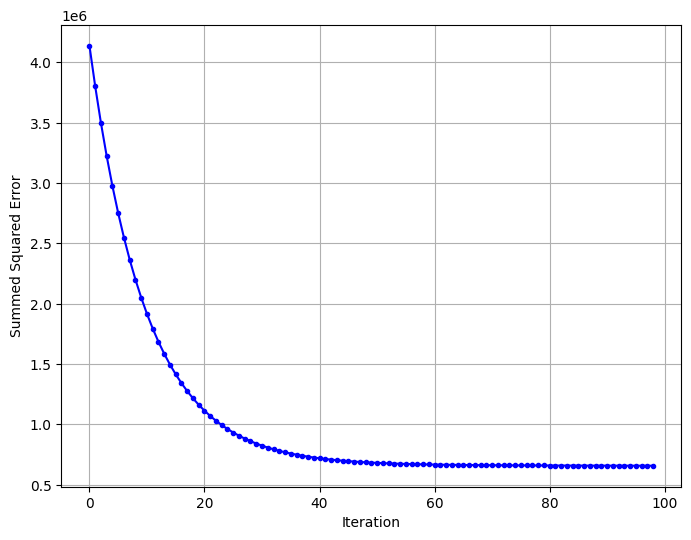

In [10]:
initial = [0.1, 1] # Set the initial weight (slope) and bias (intercept)
learning_rate = 0.00001 # Set the learning rate

gradient_descent_COVID(gradient, X, Y, initial,learning_rate,stop_tolerance=1e-02, ylim=1200) #update initial weight till the loss converges

### Discussion
* * *
Why can you take the logarithm of the loss function and optimize this instead? 
* * *

- Log 변환을 할 경우,종속 변수의 분산이 안정화되어 등분산성(homoscedasticity)을 확보할 수 있음
- log 변환에 의해 gradient descent과정이 안정적으로 되어 효율적인 학습이 가능해짐


- Smoothing and Compression: The logarithmic transformation compresses the range of the function. Large values are pulled closer together, and differences between small values are amplified. This compression can smooth out some of the steep regions of the function, leading to a more "gentle" landscape for optimization.
- Steepness: The steepness of the function is directly related to the magnitude of its gradient. For functions with large values, taking the logarithm can significantly reduce the gradient's magnitude, leading to more stable and possibly faster convergence.
- Learning Rate: If you're using the same learning rate for both the original and log-transformed functions, the log-transformed function may benefit more from that particular learning rate. Remember, the step size in gradient descent is proportional to the gradient magnitude. With the logarithmic transformation, the gradient magnitudes might be more suitable for the chosen learning rate.
- Convexity: The logarithmic transformation can make some non-convex problems appear more convex. Gradient descent tends to work better and converge faster for convex problems.
- Scale Invariance: Logarithmic transformation can provide a form of scale invariance. This means the function's shape remains similar across different scales, which can be beneficial for optimization.

# Bonus: online loss function plot (20 points):
* * *
Update the function with an additional parameter like so:
* * *
```python
def gradient_descent(gradient, X, Y, initial, learning_rate=0.001, max_iter=100, stop_tolerance=1e-06, online_loss_plot=False,online_surf_plot=False):
```
* * *
If online_surf_plot is True, then the function should also plot a surface plot of the loss surface together with all previous estimates at each iteration (use a wait-time of 0.01s internally to not overload the plotting). 
Check the class notebook for an example or use your own way to do this in ipython notebooks. 
The output should then look similar to this [without the Newton-Raphson plot].
* * *
In order to properly do this, you need to think about a “large” enough space of parameters to cover, so that the plot looks good enough - this is in general a non-trivial problem, as you do not know where the actual optimal point will go in
advance. 
Choose “meaningful” parameters for the student data and add the results to the notebook.
* * *


In [11]:
# Define a gradient descent function that optimizes a linear function and provides a 3D visualization of the optimization process
def gradient_descent_3d(gradient, X, Y, initial, learning_rate=0.001, max_iter=100, stop_tolerance=1e-02, online_loss_plot=True, online_surf_plot=True):
    
    [m,b] = initial
    
    # Initialize lists to store the weight (m), bias (b), and loss values at each iteration
    xli = [m]
    yli = [b]
    zli = [loss(m, b, X, Y)]
    
    # Initialize an array to store the loss values at each iteration
    errors = np.zeros(max_iter)
    
    # Generate a range of x-values for plotting purposes
    x = np.arange(25, 75)
    
    # Loop through the specified number of iterations
    for i in range(max_iter):
        
        # Calculate the gradient (partial derivatives) using the provided gradient function
        dm, db = gradient(m, b, X, Y)
        
        # Update the slope (m) and y-intercept (b) using the calculated gradients and the specified learning rate
        m -= learning_rate * dm
        b -= learning_rate * db
        
        # Calculate the predicted y-values using the updated m and b
        y = [m * x_i + b for x_i in x]
        
        # Compute the loss using the 'loss' function and store it in the 'errors' array
        errors[i] = loss(m, b, X, Y)
        
        # Check if the change in loss between the current and previous iteration is below the stop tolerance
        if i > 0:
            if abs(errors[i-1] - errors[i]) < stop_tolerance:
                # If the change in loss is below the tolerance, break the loop early
                break
        
        # Append the current m, b, and loss values to their respective lists
        xli.append(m)
        yli.append(b)
        zli.append(errors[i])
        
        # If real-time 2D plotting is enabled, plot the data points and the regression line at each iteration
        if online_loss_plot:
            plt.figure(figsize=(10,6))
            display.clear_output(wait=True)
            plt.xlim(20, 80)
            plt.ylim(0, 140)
            plt.scatter(X, Y, c='b')
            plt.plot(x, y, c='k')
            plt.grid()
            plt.title('Current iteration {}, Total loss = {:.2f}'.format(i+1, loss(m, b, X, Y)))
            time.sleep(0.01)
            plt.show()
        
        # If real-time 3D plotting is enabled, visualize the optimization process in 3D space at each iteration
        if online_surf_plot:
            # Define ranges for m and b for the surface plot
            ms = np.linspace(4, -4, 30)
            bs = np.linspace(4, -4, 30)
            
            [msm, bsm] = np.meshgrid(ms, bs)
    
            lossSurface = np.zeros((30, 30))
            
            # Compute the loss for all combinations of m and b values
            for i, m_i in enumerate(ms):
                for j, b_i in enumerate(bs):
                    lossSurface[j, i] = loss(m_i, b_i, X, Y)
            
            # Plot the 3D surface representing the loss for various m and b values, and the path taken by gradient descent
            fig = plt.figure(figsize=(10, 6))
            display.clear_output(wait=True)
            ax = plt.axes(projection='3d')
            ax.plot_surface(msm, bsm, lossSurface, cmap='viridis', edgecolor='none', alpha=0.7)
            ax.scatter(xli, yli, zli, c='g')
            ax.plot(xli, yli, zli, c='red')
            ax.set_title('Surface plot')
            time.sleep(0.01)
            plt.show()
    
    # If either of the real-time plotting options is enabled, plot the loss values over the performed iterations
    if online_loss_plot or online_surf_plot:
        fig, ax = plt.subplots(figsize=(8, 6))
        plt.plot(errors[0:i], 'b.-')
        plt.xlabel('Iteration')
        plt.ylabel('Summed Squared Error')
        plt.grid()
    
    # Return the optimized values for the slope (m) and y-intercept (b)
    return [m,b]


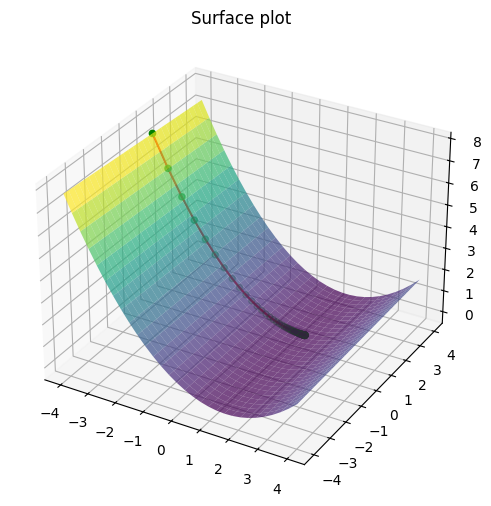

[1.4564856070818324, 1.108077142180045]

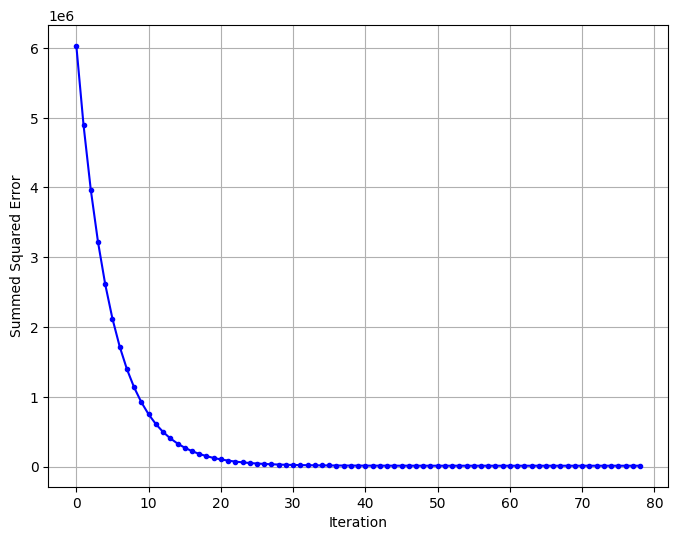

In [12]:
data = np.genfromtxt('https://raw.githubusercontent.com/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/master/data.csv', delimiter=',')

X = data[:, 0]
Y = data[:, 1]
learning_rate = 0.0000002 #define learning_rate
initial=[-4,1] #initialize weight and bias

gradient_descent_3d(gradient, X, Y, initial,learning_rate, max_iter=200, stop_tolerance=1e-1,online_loss_plot=False,online_surf_plot=True)